# 🧠 Single-Layer Perceptron: Visualizing Weights, Bias, and Activation

## Case #1 : C = A

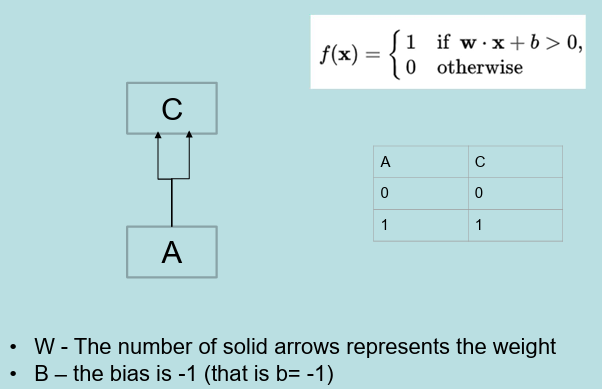



This perceptron has:

- One input node **A**
- One output node **C**
- Weight **w = 2** (represented by 2 arrows)
- Bias **b = -1**
- Activation function is a **step function**:
  
  \[
  f(x) = 
  \begin{cases} 
  1 & \text{if } w \cdot x + b > 0 \\
  0 & \text{otherwise}
  \end{cases}
  \]

Let's reproduce this in code using both **PyTorch** and **TensorFlow**.

---

## 🧪 PyTorch Implementation

Make sure to install these libraries in your virtual environment before you run the code:

```python
!pip install torch tensorflow notebook

```
```python
import torch

# Define weight and bias
w = torch.tensor(2.0)
b = torch.tensor(-1.0)

# Step activation function
def step(x):
    return 1 if x > 0 else 0

# Run for all inputs A = 0 or 1
for A in [0, 1]:
    x = torch.tensor(A, dtype=torch.float32)
    linear_output = w * x + b
    y = step(linear_output)
    print(f"Input A: {A} → Linear Output: {linear_output:.1f} → Output C: {y}")


In [1]:
import tensorflow as tf

# Define weight and bias
w = tf.constant(2.0)
b = tf.constant(-1.0)

# Step activation function
def step(x):
    return tf.where(x > 0, 1, 0)

# Run for all inputs A = 0 or 1
for A in [0, 1]:
    x = tf.constant(float(A))
    linear_output = w * x + b
    y = step(linear_output)
    print(f"Input A: {A} → Linear Output: {linear_output.numpy():.1f} → Output C: {y.numpy()}")


Input A: 0 → Linear Output: -1.0 → Output C: 0
Input A: 1 → Linear Output: 1.0 → Output C: 1


Here’s a side-by-side style comparison and integrated implementation of the Single-Layer Perceptron using both PyTorch and TensorFlow, formatted for a Jupyter Notebook. The goal is to clearly demonstrate how both frameworks approach the same logic:

In [2]:
# --- Imports ---
import torch
import tensorflow as tf

# --- Model Parameters (same for both) ---
weight = 2.0
bias = -1.0

# --- Step Activation Function (same logic) ---
def step(x):
    return 1 if x > 0 else 0

# --- Input values to test ---
inputs = [0, 1]

# --- PyTorch Implementation ---
print("🔵 PyTorch Perceptron Output")
for A in inputs:
    x_torch = torch.tensor(float(A))
    linear_output = weight * x_torch + bias
    output = step(linear_output.item())
    print(f"Input A: {A} → Linear: {linear_output.item():.1f} → Output C: {output}")

print("\n🟢 TensorFlow Perceptron Output")
# --- TensorFlow Implementation ---
for A in inputs:
    x_tf = tf.constant(float(A))
    linear_output = weight * x_tf + bias
    output = step(linear_output.numpy())
    print(f"Input A: {A} → Linear: {linear_output.numpy():.1f} → Output C: {output}")


🔵 PyTorch Perceptron Output
Input A: 0 → Linear: -1.0 → Output C: 0
Input A: 1 → Linear: 1.0 → Output C: 1

🟢 TensorFlow Perceptron Output
Input A: 0 → Linear: -1.0 → Output C: 0
Input A: 1 → Linear: 1.0 → Output C: 1


### 🧠 AND Gate as a Perceptron: PyTorch vs TensorFlow

### Case #2 : C = A and B

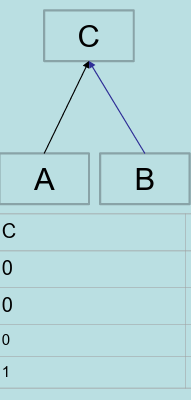

🧾 Model Description
Inputs: A, B

- Weight for A: 1
- Weight for B: 1
- Bias: -1.5

Activation: Step function (binary output)

In [3]:
import torch
import tensorflow as tf

# Shared configuration
weights = [1.0, 1.0]  # w_A = 1, w_B = 1
bias = -1.5
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

def step(x):
    return 1 if x > 0 else 0

print("🔵 PyTorch Perceptron Output")
for A, B in inputs:
    x = torch.tensor([A, B], dtype=torch.float32)
    w = torch.tensor(weights)
    linear_output = torch.dot(w, x) + bias
    output = step(linear_output.item())
    print(f"Input A={A}, B={B} → Linear: {linear_output.item():.1f} → Output C: {output}")

print("\n🟢 TensorFlow Perceptron Output")
for A, B in inputs:
    x = tf.constant([A, B], dtype=tf.float32)
    w = tf.constant(weights)
    linear_output = tf.reduce_sum(w * x) + bias
    output = step(linear_output.numpy())
    print(f"Input A={A}, B={B} → Linear: {linear_output.numpy():.1f} → Output C: {output}")


🔵 PyTorch Perceptron Output
Input A=0, B=0 → Linear: -1.5 → Output C: 0
Input A=1, B=0 → Linear: -0.5 → Output C: 0
Input A=0, B=1 → Linear: -0.5 → Output C: 0
Input A=1, B=1 → Linear: 0.5 → Output C: 1

🟢 TensorFlow Perceptron Output
Input A=0, B=0 → Linear: -1.5 → Output C: 0
Input A=1, B=0 → Linear: -0.5 → Output C: 0
Input A=0, B=1 → Linear: -0.5 → Output C: 0
Input A=1, B=1 → Linear: 0.5 → Output C: 1


### 🧠 OR Gate as a Perceptron: PyTorch vs TensorFlow

### Case #3 : C = A or B

🖼️ Diagram


💡 Code Walkthrough Talking Points

- Linear combination: The perceptron computes w₁·A + w₂·B + b. That’s the raw "score".
- Step activation: If the result > 0, output is 1; otherwise 0 — mimicking binary logic gates.
- Bias control: The bias -1.5 ensures that both A and B must be 1 to activate the output.

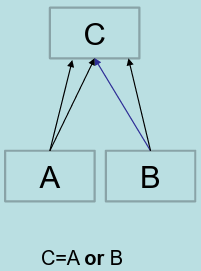

🧾 Model Description
Inputs: A, B

Weights:

- A → C: 1
- B → C: 2
- Bias: -0.5

Activation: Step function

In [ ]:
import torch
import tensorflow as tf

# Model parameters
weights = [1.0, 2.0]  # A → 1, B → 2
bias = -0.5
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

def step(x):
    return 1 if x > 0 else 0

print("🔵 PyTorch OR Perceptron Output")
for A, B in inputs:
    # torch.tensor creates a new tensor (multi-dimensional array) from the given data.
    # Here, it converts the Python list [A, B] into a PyTorch tensor of type float32.
    x = torch.tensor([A, B], dtype=torch.float32)
    w = torch.tensor(weights)
    # torch.dot computes the dot product of two 1D tensors (vectors).
    # For example, torch.dot(w, x) = w[0]*x[0] + w[1]*x[1]
    linear_output = torch.dot(w, x) + bias
    output = step(linear_output.item())
    print(f"Input A={A}, B={B} → Linear: {linear_output.item():.1f} → Output C: {output}")

print("\n🟢 TensorFlow OR Perceptron Output")
for A, B in inputs:
    # tf.constant creates a constant tensor from the given data.
    # Here, it converts the Python list [A, B] into a TensorFlow tensor of type float32.
    x = tf.constant([A, B], dtype=tf.float32)
    w = tf.constant(weights)
    linear_output = tf.reduce_sum(w * x) + bias
    output = step(linear_output.numpy())
    print(f"Input A={A}, B={B} → Linear: {linear_output.numpy():.1f} → Output C: {output}")


🔵 PyTorch OR Perceptron Output
Input A=0, B=0 → Linear: -0.5 → Output C: 0
Input A=1, B=0 → Linear: 0.5 → Output C: 1
Input A=0, B=1 → Linear: 1.5 → Output C: 1
Input A=1, B=1 → Linear: 2.5 → Output C: 1

🟢 TensorFlow OR Perceptron Output
Input A=0, B=0 → Linear: -0.5 → Output C: 0
Input A=1, B=0 → Linear: 0.5 → Output C: 1
Input A=0, B=1 → Linear: 1.5 → Output C: 1
Input A=1, B=1 → Linear: 2.5 → Output C: 1


💡 Code Walkthrough Talking Points
Weighting B more: Input B has a stronger influence on C (weight = 2), reflecting the blue arrow.

OR logic: With bias = -0.5, even a single active input (A or B) is enough to activate C.

Threshold control: The bias lowers the threshold so only one input needs to be active.

🧠 Inhibitory Logic in Perceptrons: Modeling C = A ∧ ¬B

🖼️ Diagram

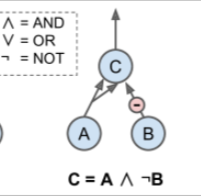

🧾 Model Description
Inputs:

- A: regular excitatory input (weight = +1)
- **B: inhibitory input (weight = –1)**
- Bias: –0.5

Activation: Step function

Logic: Neuron C activates only if A is ON and B is OFF.

In [ ]:
import torch
import tensorflow as tf

# Inputs: A, B
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
weights = [1.0, -1.0]  # A=+1, B=-1
bias = -0.5

def step(x):
    return 1 if x > 0 else 0

print("🔵 PyTorch Implementation")
for A, B in inputs:
    print(f"Input A={A}, B={B}")
    x = torch.tensor([A, B], dtype=torch.float32)
    w = torch.tensor(weights)
    # torch.dot computes the dot product of two tensors.
    # Here, it calculates the weighted sum of inputs: z = w[0]*x + w[1]*x + bias
    z = torch.dot(w, x) + bias
    print(f"z (weighted sum) = {z.item():.1f}")
    y = step(z.item())
    print(f"A={A}, B={B} → z={z.item():.1f} → C={y}")

print("\n🟢 TensorFlow Implementation")
for A, B in inputs:
    x = tf.constant([A, B], dtype=tf.float32)
    w = tf.constant(weights)
    z = tf.reduce_sum(w * x) + bias
    y = step(z.numpy())
    print(f"A={A}, B={B} → z={z.numpy():.1f} → C={y}")


🔵 PyTorch Implementation
Input A=0, B=0
z (weighted sum) = -0.5
A=0, B=0 → z=-0.5 → C=0
Input A=1, B=0
z (weighted sum) = 0.5
A=1, B=0 → z=0.5 → C=1
Input A=0, B=1
z (weighted sum) = -1.5
A=0, B=1 → z=-1.5 → C=0
Input A=1, B=1
z (weighted sum) = -0.5
A=1, B=1 → z=-0.5 → C=0

🟢 TensorFlow Implementation
A=0, B=0 → z=-0.5 → C=0
A=1, B=0 → z=0.5 → C=1
A=0, B=1 → z=-1.5 → C=0
A=1, B=1 → z=-0.5 → C=0


### 🧠 Challenge

### Use a Single Layer Perceptron to decide is you will go to the movies

Source: https://youtu.be/OFbnpY_k7js?si=aLIumFjjRtAMtxtm

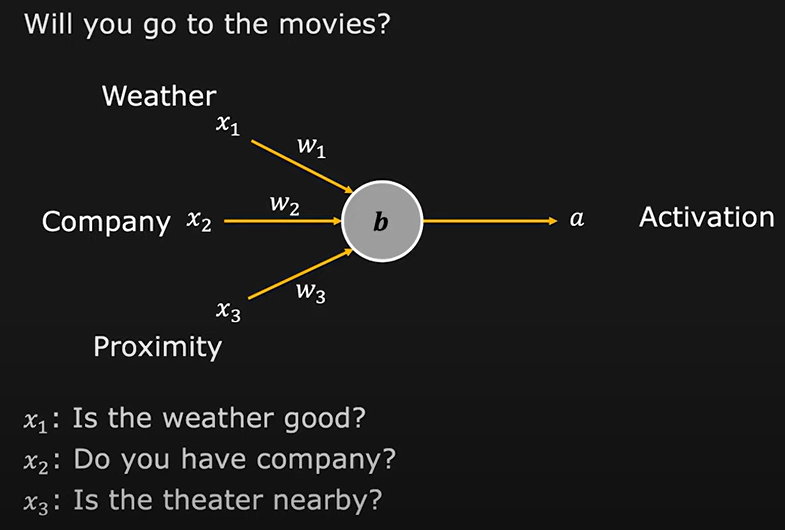

You can add and play with your own weights and biases.
Use the same activation function as in the examples above.
Add a talking point you can share with the class.

Here is a complete code cell implementing the single-layer perceptron to answer:

"Will you go to the movies?"
Based on: weather, company, and proximity

We'll use:

- Binary inputs x₁, x₂, x₃
- Weights: w₁ = 1.0 (weather), w₂ = 1.0 (company), w₃ = 1.0 (proximity)
- Bias b = -2.5 to require at least 3 "yes" answers to return a 1 (i.e., go to the movies)

In [10]:
from itertools import product

# Inputs: weather (x1), company (x2), proximity (x3)
weights = [1.0, 1.0, 1.0]   # w1, w2, w3
bias = -2.5                 # threshold: all three must be 1 for output = 1

def step(z):
    return 1 if z > 0 else 0

print("x1 x2 x3 | z      | Output")
print("----------------------------")
for x in product([0, 1], repeat=3):
    z = sum(w * xi for w, xi in zip(weights, x)) + bias
    output = step(z)
    print(f"{x[0]}  {x[1]}  {x[2]} | {z:>5.1f} |   {output}")


x1 x2 x3 | z      | Output
----------------------------
0  0  0 |  -2.5 |   0
0  0  1 |  -1.5 |   0
0  1  0 |  -1.5 |   0
0  1  1 |  -0.5 |   0
1  0  0 |  -1.5 |   0
1  0  1 |  -0.5 |   0
1  1  0 |  -0.5 |   0
1  1  1 |   0.5 |   1


🧠 Interpretation

- x₁: Is the weather good?
- x₂: Do you have company?
- x₃: Is the theater nearby?

Output 1 → You will go to the movies.

Output 0 → You won't go.

This simulates human-like logic where all conditions must be favorable.

---

### 🧠 How Does the Perceptron Behave as a Linear Classifier?

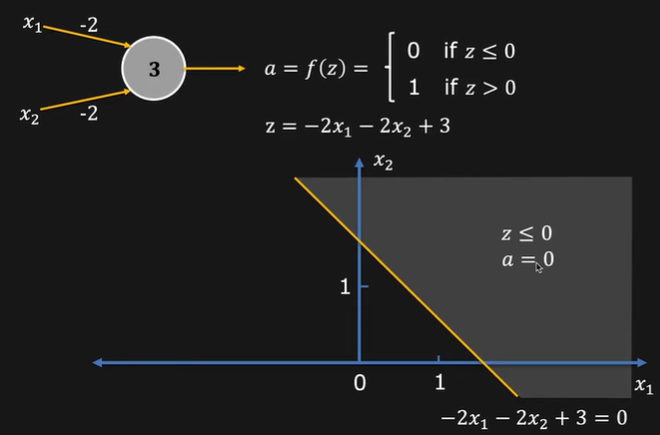

### 🧩 What's Happening in This Diagram?

- The **perceptron** computes:
  
  \[
  z = -2x_1 - 2x_2 + 3
  \]

- It then applies the **step activation**:
  
  \[
  a = 
  \begin{cases}
  1 & \text{if } z > 0 \\
  0 & \text{if } z \leq 0
  \end{cases}
  \]

---

### 📊 What Is the Yellow Line?

- It's the **decision boundary**, found by setting $z = 0$.
- That gives:

  $$
  -2x_1 - 2x_2 + 3 = 0 \quad \Rightarrow \quad x_2 = -x_1 + 1.5
  $$

- This line separates the input space into:

  - 🟡 **Above the line** → $z > 0$ → $a = 1$
  - ⚫ **Below or on the line** → $z \leq 0$ → $a = 0$

---

### 🧠 Why It Matters

This shows that a **single-layer perceptron classifies data using a straight line** (in 2D) — a **linear decision boundary**. If the inputs are linearly separable, the perceptron can perfectly classify them.


In [ ]:
import numpy as np

class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
        self.learning_rate = learning_rate

    def activation(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error

# Example usage:
# Suppose you have 3 features: [is_weekend, friend_available, good_movie]
# X = np.array([[1, 1, 1], [0, 1, 1], [1, 0, 0], ...])
# y = np.array([1, 1, 0, ...])  # 1 = go to movies, 0 = don't go

# Initialize perceptron
perceptron = SingleLayerPerceptron(input_size=3)

# Train on your data
# perceptron.train(X, y, epochs=20)

# Predict for a new situation
# new_input = np.array([1, 0, 1])
# print(perceptron.predict(new_input))